In [1]:
import numpy as np
from copy import deepcopy

from PIL import Image
import imageio

import matplotlib.pyplot as plt
%matplotlib inline

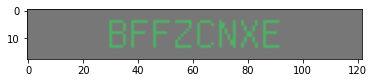

In [2]:
def get_lights(data):
    positions = []
    velocitys = []
    for line in data:
        line = line.strip()
        start = line.find('<')
        end = line.find('>')
        part = line[start+1:end]
        x, y = part.split(',')
        positions.append([int(x), int(y)])
        line = line[end+1:]
        
        start = line.find('<')
        end = line.find('>')
        part = line[start+1:end]
        x, y = part.split(',')
        velocitys.append([int(x), int(y)])
        
    positions = np.array(positions)
    velocitys = np.array(velocitys)
    
    return positions, velocitys

def run_lights_size(positions, velocitys, n):    
    for i in range(1, n+1):
        positions += velocitys
        
    min_x = np.min(positions[:,0])
    max_x = np.max(positions[:,0])
    min_y = np.min(positions[:,1])
    max_y = np.max(positions[:,1])
            
    return min_x, max_x, min_y, max_y

def run_lights_frames(positions, velocitys, n, min_x, max_x, min_y, max_y):
    dx = max_x - min_x
    dy = max_y - min_y
    image = np.ones((2*dy,2*dx,3), dtype=int)*119
    
    for i in range(1, n+1):
        for position in positions:
            x = position[0]-min_x+int(dx/2)
            y = position[1]-min_y+int(dy/2)
            if x >= 0 and x < image.shape[1] and y >= 0 and y < image.shape[0]:
                image[y,x] = np.array([119,119,119])
            
        positions += velocitys
        
        for position in positions:
            x = position[0]-min_x+int(dx/2)
            y = position[1]-min_y+int(dy/2)
            if x >= 0 and x < image.shape[1] and y >= 0 and y < image.shape[0]:
                image[y,x] = np.array([78,178,101])
            
        frame = Image.fromarray(image.astype('uint8'), mode='RGB')
        frame = frame.resize((image.shape[0]*8,image.shape[1]*8), resample=Image.NEAREST)
        frame.save('./Day10-Frames/day10_'+str(i).zfill(5)+'.png')
        
    plt.imshow(image)
    plt.show()
    
def make_frames():
    with open('day10_input.txt', 'r') as f:
        data = f.readlines()
        f.close()
        
    positions, velocitys = get_lights(data)
    n = 10391
    min_x, max_x, min_y, max_y = run_lights_size(deepcopy(positions), velocitys, n)
    run_lights_frames(positions, velocitys, n, min_x, max_x, min_y, max_y)
    
make_frames()

In [3]:
from shutil import copy
for t in range(10391+1, 10391+241):
    copy('./Day10-Frames/day10_10391.png', './Day10-Frames/day10_'+str(t).zfill(5)+'.png')